In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("../data/billionaire/forbes_2022_billionaires.csv")

In [181]:
df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [182]:
df.shape

(2668, 22)

In [183]:
df.dtypes

rank                      int64
personName               object
age                     float64
finalWorth              float64
year                      int64
month                     int64
category                 object
source                   object
country                  object
state                    object
city                     object
countryOfCitizenship     object
organization             object
selfMade                   bool
gender                   object
birthDate                object
title                    object
philanthropyScore       float64
residenceMsa             object
numberOfSiblings        float64
bio                      object
about                    object
dtype: object

In [184]:
df = df.loc[:,["rank","personName","age","finalWorth","category","country","gender"]]
df.head()

,rank,personName,age,finalWorth,category,country,gender
0,1,Elon Musk,50.0,219000.0,Automotive,United States,M
1,2,Jeff Bezos,58.0,171000.0,Technology,United States,M
2,3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
3,4,Bill Gates,66.0,129000.0,Technology,United States,M
4,5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M


In [185]:
df = df.set_index("rank")
df.head()

,personName,age,finalWorth,category,country,gender
rank,,,,,,
1,Elon Musk,50.0,219000.0,Automotive,United States,M
2,Jeff Bezos,58.0,171000.0,Technology,United States,M
3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
4,Bill Gates,66.0,129000.0,Technology,United States,M
5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M


In [186]:
df.isnull().sum()

personName     0
age           86
finalWorth     0
category       0
country       13
gender        16
dtype: int64

In [187]:
df.dropna(inplace=True)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2568 entries, 1 to 2578
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   personName  2568 non-null   object 
 1   age         2568 non-null   float64
 2   finalWorth  2568 non-null   float64
 3   category    2568 non-null   object 
 4   country     2568 non-null   object 
 5   gender      2568 non-null   object 
dtypes: float64(2), object(4)
memory usage: 140.4+ KB


In [189]:
#Calculate the average gender of billionaires using barplot
df['gender'].value_counts()

M    2282
F     286
Name: gender, dtype: int64

In [190]:
df["gender"].value_counts(normalize=True)

M    0.888629
F    0.111371
Name: gender, dtype: float64

In [191]:
df_gender = df.groupby(['gender'])

In [192]:
df_gender["age"].mean()

gender
F    62.937063
M    64.409290
Name: age, dtype: float64

Text(0.5, 1.0, 'Average ages of men and women')

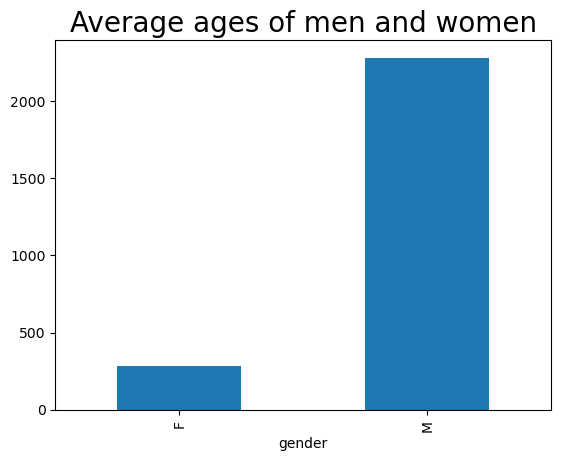

In [193]:
df_gender.size().plot(kind = "bar")
plt.title('Average ages of men and women', fontsize = 20)

Text(0.5, 1.0, 'Top 10 richest')

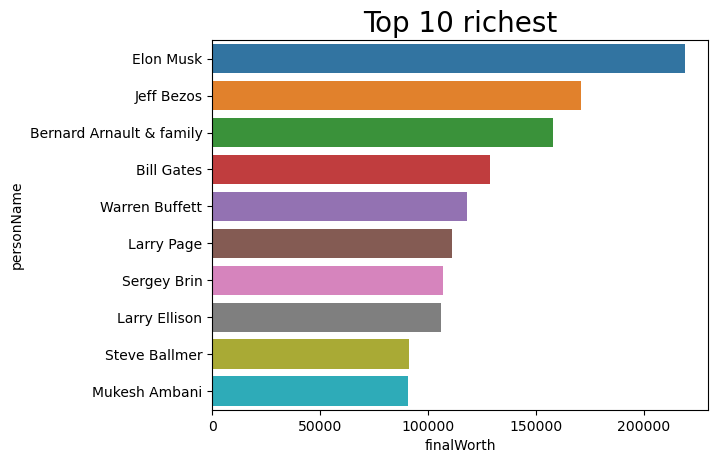

In [194]:
#Top 10 richest in the wold using barplot
sns.barplot(y=df['personName'][:10], x=df['finalWorth'][:10])
plt.title('Top 10 richest', fontsize=20)

In [195]:
#Countries with most billionaires
len(df['country'].unique())

73

In [196]:
df_country = df.groupby('country')

In [197]:
df_country_new = pd.DataFrame(df_country.size().sort_values(ascending=False), columns=['Count'])

In [198]:
df_country_new.head()

,Count
country,
United States,742
China,546
India,154
Germany,94
United Kingdom,81


Text(0.5, 1.0, 'Top 10 countries')

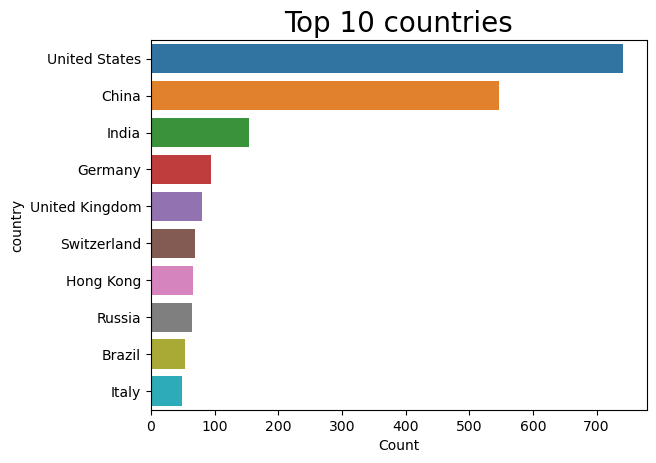

In [199]:
sns.barplot(x=df_country_new["Count"][:10], y=df_country_new.index[:10])
plt.title('Top 10 countries', fontsize = 20)

In [200]:
#Top 10 categories
df['category'].unique()

array(['Automotive', 'Technology', 'Fashion & Retail',
       'Finance & Investments', 'Diversified', 'Media & Entertainment',
       'Telecom', 'Food & Beverage', 'Logistics', 'Real Estate',
       'Metals & Mining', 'Manufacturing', 'Gambling & Casinos',
       'Healthcare', 'Service', 'Energy', 'Construction & Engineering',
       'Sports'], dtype=object)

In [201]:
df["category"]=df["category"].apply(lambda x:x.replace(" ","")).apply(lambda x:x.replace("&","_"))

In [202]:
df["category"].unique()

array(['Automotive', 'Technology', 'Fashion_Retail',
       'Finance_Investments', 'Diversified', 'Media_Entertainment',
       'Telecom', 'Food_Beverage', 'Logistics', 'RealEstate',
       'Metals_Mining', 'Manufacturing', 'Gambling_Casinos', 'Healthcare',
       'Service', 'Energy', 'Construction_Engineering', 'Sports'],
      dtype=object)

In [203]:
df_category = df.groupby("category").size()
df_category.head()

category
Automotive                   66
Construction_Engineering     45
Diversified                 174
Energy                       93
Fashion_Retail              238
dtype: int64

In [204]:
df_category = df_category.to_frame()
df_category.head()

,0
category,
Automotive,66
Construction_Engineering,45
Diversified,174
Energy,93
Fashion_Retail,238


In [205]:
df_category=df_category.rename(columns = {0:"Count"}).sort_values(by = "Count", ascending=False)
df_category.head()

,Count
category,
Finance_Investments,381
Technology,332
Manufacturing,319
Fashion_Retail,238
Healthcare,209


Text(0.5, 1.0, 'Top 10 categories')

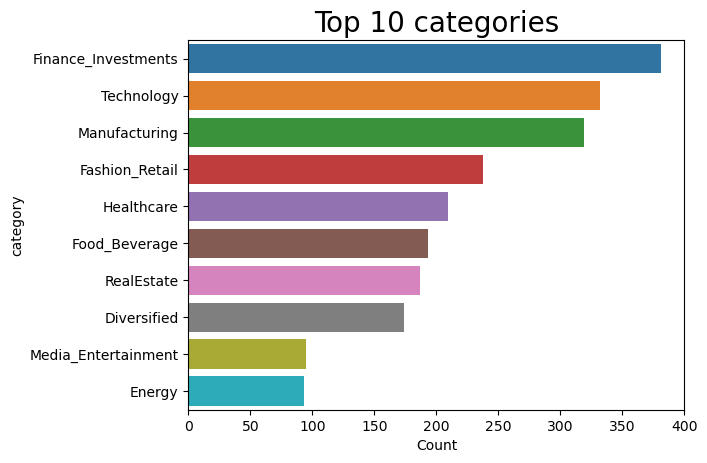

In [206]:
sns.barplot(x=df_category["Count"][:10], y=df_category.index[:10])
plt.title('Top 10 categories', fontsize = 20)

Text(0.5, 1.0, 'The relationship between money and age')

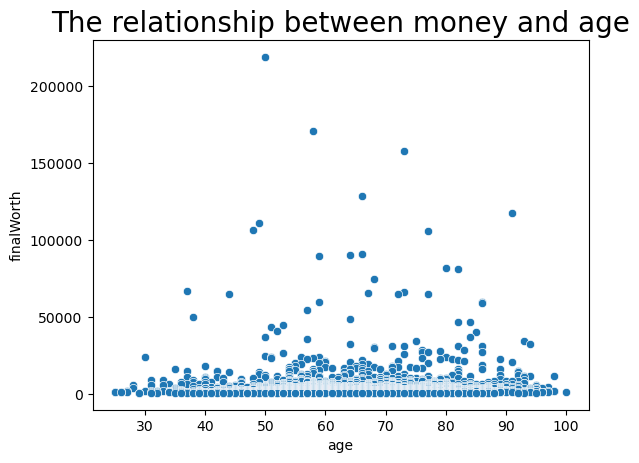

In [207]:
#Age-wise worth of billionaires
sns.scatterplot(x=df["age"], y=df["finalWorth"])
plt.title('The relationship between money and age', fontsize = 20)

Text(0.5, 1.0, 'The distribution of age')

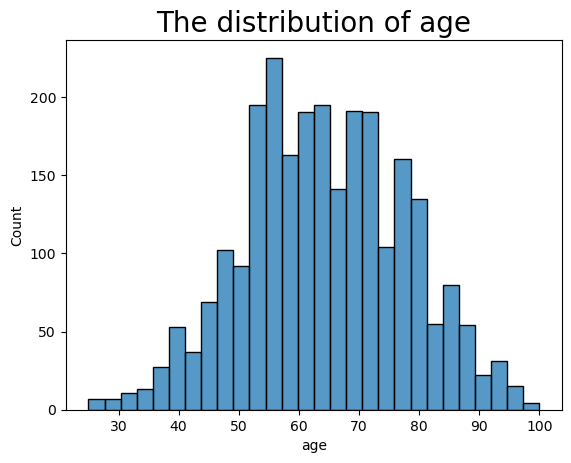

In [208]:
#Age distribution among billionaires
sns.histplot(df["age"])
plt.title('The distribution of age', fontsize = 20)